# **Import Modules**

## *python*

In [1]:
# Import python modules
import os
import sys

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join("..")))

# Import relevant modules
try:
    from scripts._04_finetune_LSTM import FineTuningLSTM

    print("Module successfully imported.")

except ImportError:
    print("Could not import module from `scripts/`.")

Module successfully imported.


# **Time Series Forecasting and Modelling (ARIMA)**

In [3]:
# Load class input paths
# Specify directory
ntbk_dir = os.getcwd()  # Gets the directory of the notebook
plot_dir = os.path.join(ntbk_dir, "..", "insights", "finetuned_model")
processed_dir = os.path.join(ntbk_dir, "..", "data", "processed")
model_dir = os.path.join(ntbk_dir, "..", "model", "finetuned_lstm")

## *TSLA*

🧪 Running full finetuning pipeline...

Datatypes changed.
🔹DataFrame Head:


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return
0,2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500,NaN,NaN,0.040386
1,2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500,NaN,NaN,-0.001071
2,2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,NaN,NaN,-0.042328
3,2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,NaN,NaN,-0.048231
4,2015-07-09,17.194668,17.530001,17.119333,17.271999,50011500,NaN,NaN,0.011610



🔹 Shape: (2534, 9)

🔹 Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Trend', 'Volatility', 'Daily Return']

🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2534 non-null   datetime64[ns]
 1   Close         2534 non-null   float64       
 2   High          2534 non-null   float64       
 3   Low           2534 non-null   float64       
 4   Open          2534 non-null   float64       
 5   Volume        2534 non-null   int32         
 6   Trend         2506 non-null   float64       
 7   Volatility    2506 non-null   float64       
 8   Daily Return  2534 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 168.4 KB


💎 New column 'Log Close' is computed.

💾 Enriched data saved to ..\data\processed\TSLA_log_enriched.csv


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return,Log Close
0,2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500,NaN,NaN,0.040386,2.926811
1,2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500,NaN,NaN,-0.001071,2.925739
2,2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,NaN,NaN,-0.042328,2.882489
3,2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,NaN,NaN,-0.048231,2.833056
4,2015-07-09,17.194668,17.530001,17.119333,17.271999,50011500,NaN,NaN,0.011610,2.844599


🪓 Data splitting completed.
⚖️ Data scaling completed.
Reloading Tuner from .\TSLA_temp_lstm_tuning\tuner0.json

💾 Best hyperparameters saved to ..\data\processed\TSLA_best_hyperparameters.json

🥇 Best Model Summary and Hyperparameters


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 120, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 120, 120)       │        60,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72)             │        55,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 72)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,657 (451.79 KB)

 Trainable params: 115,657 (451.79 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 120, 'units_2': 72, 'dropout': 0.30000000000000004, 'learning_rate': 0.01}
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0398 - val_loss: 0.0028
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step

💾 Fine-tuned LSTM model saved to ..\model\finetuned_lstm\TSLA_lstm_model_tuned.keras

TSLA evaluation metrics:
 {'RMSE': 0.1989388678565984, 'MAE': 0.16161821743821647, 'R²': 0.5234642791254283}

💾 Plot saved to ..\insights\finetuned_model\TSLA_asset_price_prediction_finetuned_lstm.png


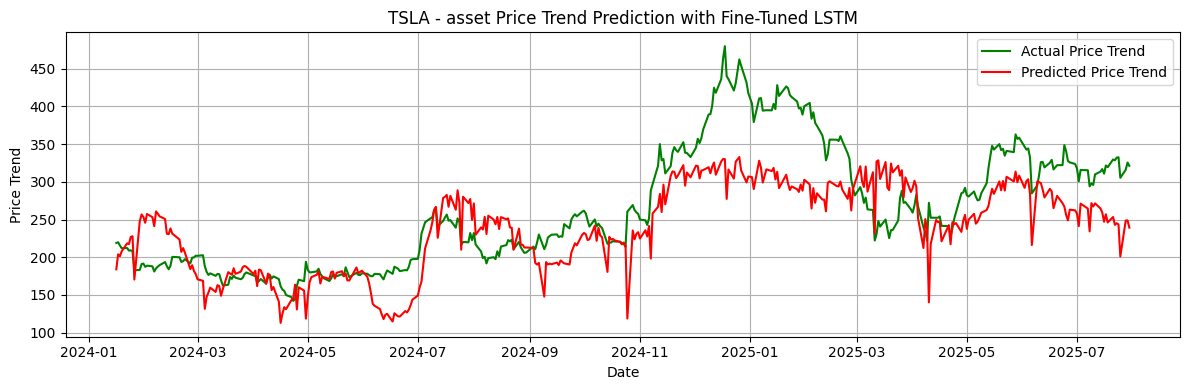

In [4]:
# Tesla (TSLA) Historical stock prices
tuner = FineTuningLSTM(
    asset_name="TSLA",
    processed_dir=processed_dir,
    processed_path=os.path.join(
        ntbk_dir, "..", "data/processed/TSLA_stock_price_enriched.csv"
    ),
    plot_dir=plot_dir,
    model_dir=model_dir,
    look_back=120,  # To capture longer-term cycles and momentum shifts
    project_name="TSLA_temp_lstm_tuning",
)
tuner.finetune_model()

## *BND*

🧪 Running full finetuning pipeline...

Datatypes changed.
🔹DataFrame Head:


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return
0,2015-07-02,60.967091,61.027232,60.937020,60.937020,1060100,NaN,NaN,0.002472
1,2015-07-06,61.177608,61.222718,61.057331,61.222718,2210700,NaN,NaN,0.003453
2,2015-07-07,61.237724,61.470766,61.237724,61.410630,4183200,NaN,NaN,0.000983
3,2015-07-08,61.410606,61.463229,61.312875,61.373017,1967800,NaN,NaN,0.002823
4,2015-07-09,61.207657,61.327940,61.177586,61.312902,1670900,NaN,NaN,-0.003305



🔹 Shape: (2534, 9)

🔹 Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Trend', 'Volatility', 'Daily Return']

🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2534 non-null   datetime64[ns]
 1   Close         2534 non-null   float64       
 2   High          2534 non-null   float64       
 3   Low           2534 non-null   float64       
 4   Open          2534 non-null   float64       
 5   Volume        2534 non-null   int32         
 6   Trend         2506 non-null   float64       
 7   Volatility    2506 non-null   float64       
 8   Daily Return  2534 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 168.4 KB


💎 New column 'Log Close' is computed.

💾 Enriched data saved to ..\data\processed\BND_log_enriched.csv


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return,Log Close
0,2015-07-02,60.967091,61.027232,60.937020,60.937020,1060100,NaN,NaN,0.002472,4.110334
1,2015-07-06,61.177608,61.222718,61.057331,61.222718,2210700,NaN,NaN,0.003453,4.113781
2,2015-07-07,61.237724,61.470766,61.237724,61.410630,4183200,NaN,NaN,0.000983,4.114763
3,2015-07-08,61.410606,61.463229,61.312875,61.373017,1967800,NaN,NaN,0.002823,4.117583
4,2015-07-09,61.207657,61.327940,61.177586,61.312902,1670900,NaN,NaN,-0.003305,4.114272


🪓 Data splitting completed.
⚖️ Data scaling completed.
Reloading Tuner from .\BND_temp_lstm_tuning\tuner0.json

💾 Best hyperparameters saved to ..\data\processed\BND_best_hyperparameters.json

🥇 Best Model Summary and Hyperparameters


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 60, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 120)        │        60,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 72)             │        55,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,657 (451.79 KB)

 Trainable params: 115,657 (451.79 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 120, 'units_2': 72, 'dropout': 0.30000000000000004, 'learning_rate': 0.01}
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0505 - val_loss: 0.0045
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

💾 Fine-tuned LSTM model saved to ..\model\finetuned_lstm\BND_lstm_model_tuned.keras

BND evaluation metrics:
 {'RMSE': 0.016063509282404985, 'MAE': 0.014443425737341548, 'R²': 0.7203363894526467}

💾 Plot saved to ..\insights\finetuned_model\BND_asset_price_prediction_finetuned_lstm.png


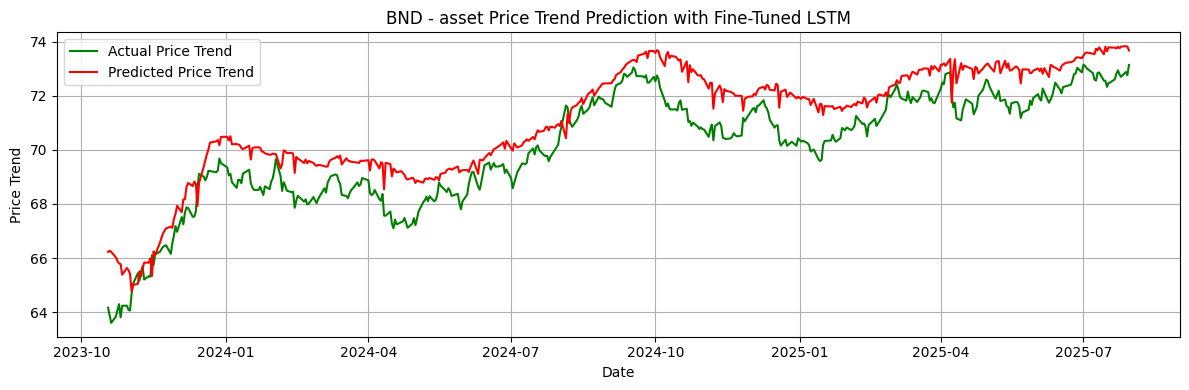

In [ ]:
# Vanguard Total Bond Market ETF (BND)
tuner = FineTuningLSTM(
    asset_name="BND",
    processed_dir=processed_dir,
    processed_path=os.path.join(
        ntbk_dir, "..", "data/processed/BND_stock_price_enriched.csv"
    ),
    plot_dir=plot_dir,
    model_dir=model_dir,
    look_back=60,  # Shorter window suffices due to stability
    project_name="BND_temp_lstm_tuning",
)
tuner.finetune_model()

## *SPY*

🧪 Running full finetuning pipeline...

Datatypes changed.
🔹DataFrame Head:


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return
0,2015-07-02,174.756927,175.566188,174.335441,175.397596,104373700,NaN,NaN,-0.000916
1,2015-07-06,174.259628,175.043588,173.256487,173.458805,117975400,NaN,NaN,-0.002846
2,2015-07-07,175.355453,175.481894,172.059422,174.461903,173820200,NaN,NaN,0.006288
3,2015-07-08,172.413437,174.293265,172.177405,174.006657,164020100,NaN,NaN,-0.016777
4,2015-07-09,172.725311,174.790607,172.615733,174.529275,144113100,NaN,NaN,0.001809



🔹 Shape: (2534, 9)

🔹 Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Trend', 'Volatility', 'Daily Return']

🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2534 non-null   datetime64[ns]
 1   Close         2534 non-null   float64       
 2   High          2534 non-null   float64       
 3   Low           2534 non-null   float64       
 4   Open          2534 non-null   float64       
 5   Volume        2534 non-null   int32         
 6   Trend         2506 non-null   float64       
 7   Volatility    2506 non-null   float64       
 8   Daily Return  2534 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 168.4 KB


💎 New column 'Log Close' is computed.

💾 Enriched data saved to ..\data\processed\SPY_log_enriched.csv


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return,Log Close
0,2015-07-02,174.756927,175.566188,174.335441,175.397596,104373700,NaN,NaN,-0.000916,5.163396
1,2015-07-06,174.259628,175.043588,173.256487,173.458805,117975400,NaN,NaN,-0.002846,5.160546
2,2015-07-07,175.355453,175.481894,172.059422,174.461903,173820200,NaN,NaN,0.006288,5.166815
3,2015-07-08,172.413437,174.293265,172.177405,174.006657,164020100,NaN,NaN,-0.016777,5.149895
4,2015-07-09,172.725311,174.790607,172.615733,174.529275,144113100,NaN,NaN,0.001809,5.151703


🪓 Data splitting completed.
⚖️ Data scaling completed.
Reloading Tuner from .\SPY_temp_lstm_tuning\tuner0.json

💾 Best hyperparameters saved to ..\data\processed\SPY_best_hyperparameters.json

🥇 Best Model Summary and Hyperparameters


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 90, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 90, 120)        │        60,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 104)            │        93,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 104)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,705 (600.41 KB)

 Trainable params: 153,705 (600.41 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 120, 'units_2': 104, 'dropout': 0.1, 'learning_rate': 0.001}
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0165 - val_loss: 0.0055
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step

💾 Fine-tuned LSTM model saved to ..\model\finetuned_lstm\SPY_lstm_model_tuned.keras

SPY evaluation metrics:
 {'RMSE': 0.07964525635880011, 'MAE': 0.0538130883894066, 'R²': 0.16291671266662577}

💾 Plot saved to ..\insights\finetuned_model\SPY_asset_price_prediction_finetuned_lstm.png


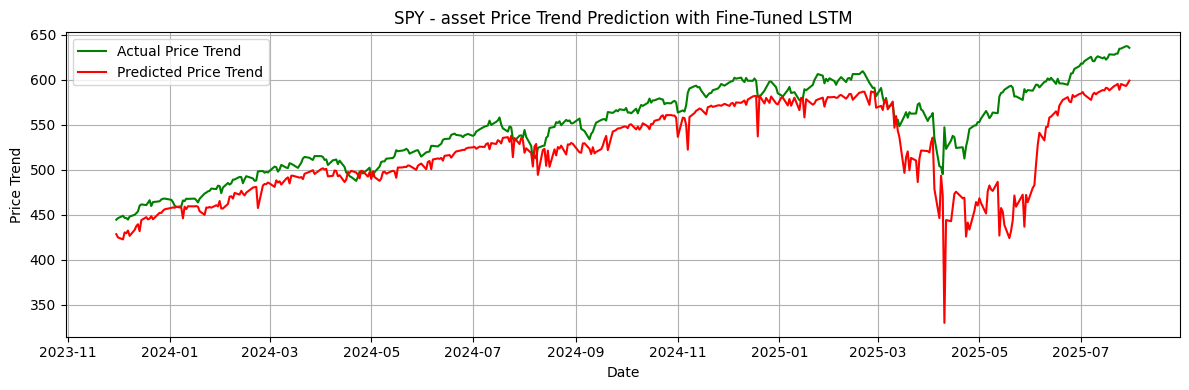

In [ ]:
# S&P 500 ETF (SPY)
tuner = FineTuningLSTM(
    asset_name="SPY",
    processed_dir=processed_dir,
    processed_path=os.path.join(
        ntbk_dir, "..", "data/processed/SPY_stock_price_enriched.csv"
    ),
    plot_dir=plot_dir,
    model_dir=model_dir,
    look_back=90,  # Balance trend detection with noise reduction
    project_name="SPY_temp_lstm_tuning",
)
tuner.finetune_model()